In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# 첫번째: sonar 데이터

In [9]:
df = pd.read_csv('./data/sonar.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [10]:
y = df.iloc[:,60]
x = df.iloc[:,:60]

In [13]:
x.shape

(208, 60)

In [11]:
# y값이 문자이므로 숫자로 변경
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)
y_enc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
# binary

In [15]:
model = Sequential()
model.add(Dense(36,input_dim = 60, activation='relu' )) # input
model.add(Dense(18, activation='relu')) # hidden
model.add(Dense(9, activation='relu')) # hidden
model.add(Dense(1,activation = 'sigmoid')) # output
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                2196      
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 3,043
Trainable params: 3,043
Non-trainable params: 0
_________________________________________________________________


In [17]:
# compile

# loss 에러율 구하는 함수
# optimizer 
model.compile(loss = 'binary_crossentropy', metrics =['accuracy'], optimizer ='adam'  )

In [19]:
# 훈련 

model.fit(x,y_enc, epochs= 100, batch_size=20)

Epoch 1/100
11/11 [==============================] - 1s 5ms/step - loss: 0.6928 - accuracy: 0.5337
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6809 - accuracy: 0.5337
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6739 - accuracy: 0.5337
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6674 - accuracy: 0.5385
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6610 - accuracy: 0.5625
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.5721
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.5721
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6296 - accuracy: 0.6202
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6182 - accuracy: 0.6346
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6018 - accuracy: 0.7115
Epoch 11/

11/11 [==============================] - 0s 4ms/step - loss: 0.0693 - accuracy: 0.9904
Epoch 84/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0701 - accuracy: 0.9904
Epoch 85/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0705 - accuracy: 0.9904
Epoch 86/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0653 - accuracy: 0.9856
Epoch 87/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0728 - accuracy: 0.9808
Epoch 88/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 0.9808
Epoch 89/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9856
Epoch 90/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9952
Epoch 91/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9904
Epoch 92/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0555 - accuracy: 0.9856
Epoch 93/100


In [ ]:
## multi

In [22]:
from tensorflow.keras.utils import to_categorical
y_oh = tf.keras.utils.to_categorical(y_enc)
y_oh

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [27]:
model = Sequential()
model.add(Dense(36, input_dim=60 , activation= 'relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation= 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 36)                2196      
                                                                 
 dense_17 (Dense)            (None, 18)                666       
                                                                 
 dense_18 (Dense)            (None, 9)                 171       
                                                                 
 dense_19 (Dense)            (None, 2)                 20        
                                                                 
Total params: 3,053
Trainable params: 3,053
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [29]:
model.fit(x, y_oh, epochs =100, batch_size =20)

Epoch 1/100
11/11 [==============================] - 0s 5ms/step - loss: 0.8009 - accuracy: 0.5337
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7025 - accuracy: 0.5337
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6806 - accuracy: 0.5577
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6625 - accuracy: 0.5962
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6458 - accuracy: 0.6298
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6272 - accuracy: 0.6635
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6075 - accuracy: 0.7019
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5886 - accuracy: 0.7212
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5667 - accuracy: 0.7308
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5457 - accuracy: 0.7452
Epoch 11/

11/11 [==============================] - 0s 3ms/step - loss: 0.1102 - accuracy: 0.9712
Epoch 84/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1093 - accuracy: 0.9856
Epoch 85/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9808
Epoch 86/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1086 - accuracy: 0.9615
Epoch 87/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1052 - accuracy: 0.9808
Epoch 88/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0958 - accuracy: 0.9856
Epoch 89/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1066 - accuracy: 0.9615
Epoch 90/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0993 - accuracy: 0.9712
Epoch 91/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0967 - accuracy: 0.9856
Epoch 92/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9904
Epoch 93/100


In [31]:
model.evaluate(x,y_oh)

7/7 [==============================] - 0s 5ms/step - loss: 0.0869 - accuracy: 0.9808


[0.0869184210896492, 0.9807692170143127]

# 두번째 : wine 데이터

In [45]:
df = pd.read_csv('./data/wine.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [46]:
y = df.iloc[:,12]
x = df.iloc[:,:12]

In [47]:
x.shape

(6497, 12)

In [56]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2, random_state=111)

In [60]:
## binary

In [58]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Dense(36,input_dim =12, activation = 'relu'))
    model.add(Dense(18,activation='relu'))
    model.add(Dense(9,activation='relu'))
    model.add((Dense(1,activation='sigmoid')))
    # compile 
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')
    model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 36)                468       
                                                                 
 dense_33 (Dense)            (None, 18)                666       
                                                                 
 dense_34 (Dense)            (None, 9)                 171       
                                                                 
 dense_35 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [59]:
# fit
model.fit(x,y, epochs=50, batch_size= 10)

Epoch 1/50
650/650 [==============================] - 3s 4ms/step - loss: 0.2274 - accuracy: 0.9217
Epoch 2/50
650/650 [==============================] - 2s 4ms/step - loss: 0.1644 - accuracy: 0.9417
Epoch 3/50
650/650 [==============================] - 2s 3ms/step - loss: 0.1384 - accuracy: 0.9531
Epoch 4/50
650/650 [==============================] - 2s 4ms/step - loss: 0.1272 - accuracy: 0.9572
Epoch 5/50
650/650 [==============================] - 2s 4ms/step - loss: 0.1073 - accuracy: 0.9646
Epoch 6/50
650/650 [==============================] - 3s 4ms/step - loss: 0.1030 - accuracy: 0.9666
Epoch 7/50
650/650 [==============================] - 2s 3ms/step - loss: 0.0981 - accuracy: 0.9674
Epoch 8/50
650/650 [==============================] - 2s 4ms/step - loss: 0.0915 - accuracy: 0.9706
Epoch 9/50
650/650 [==============================] - 2s 4ms/step - loss: 0.0874 - accuracy: 0.9729
Epoch 10/50
650/650 [==============================] - 3s 4ms/step - loss: 0.0836 - accuracy: 0.9737

In [86]:
## categorical

In [87]:
y = df.iloc[:,12]
x = df.iloc[:,:12]

In [88]:
x.shape

(6497, 12)

In [89]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [90]:
from tensorflow.keras.utils import to_categorical
y_oh = tf.keras.utils.to_categorical(y)
y_oh

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [91]:
x_train, x_test, y_train, y_test =  train_test_split(x,y_oh, test_size=0.2)

In [92]:
model = Sequential()
model.add(Dense(36, input_dim=12, activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(9, activation= 'relu'))
model.add(Dense(2, activation= 'softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 36)                468       
                                                                 
 dense_53 (Dense)            (None, 18)                666       
                                                                 
 dense_54 (Dense)            (None, 9)                 171       
                                                                 
 dense_55 (Dense)            (None, 2)                 20        
                                                                 
Total params: 1,325
Trainable params: 1,325
Non-trainable params: 0
_________________________________________________________________


In [93]:
# compile
model.compile(loss= 'categorical_crossentropy', metrics=['accuracy'], optimizer ='adam' )

In [94]:
# fit
history = model.fit(x_train, y_train, epochs=50, batch_size=10)
history

Epoch 1/50
520/520 [==============================] - 2s 4ms/step - loss: 0.2163 - accuracy: 0.9267
Epoch 2/50
520/520 [==============================] - 2s 4ms/step - loss: 0.1828 - accuracy: 0.9359
Epoch 3/50
520/520 [==============================] - 2s 3ms/step - loss: 0.1584 - accuracy: 0.9444
Epoch 4/50
520/520 [==============================] - 2s 3ms/step - loss: 0.1319 - accuracy: 0.9556
Epoch 5/50
520/520 [==============================] - 2s 3ms/step - loss: 0.1144 - accuracy: 0.9636
Epoch 6/50
520/520 [==============================] - 2s 3ms/step - loss: 0.1068 - accuracy: 0.9648
Epoch 7/50
520/520 [==============================] - 2s 3ms/step - loss: 0.0963 - accuracy: 0.9692
Epoch 8/50
520/520 [==============================] - 2s 3ms/step - loss: 0.0920 - accuracy: 0.9704
Epoch 9/50
520/520 [==============================] - 2s 3ms/step - loss: 0.0853 - accuracy: 0.9733
Epoch 10/50
520/520 [==============================] - 2s 4ms/step - loss: 0.0879 - accuracy: 0.9721

In [95]:
model.evaluate(x_test,y_test)

41/41 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9823


[0.04905437305569649, 0.9823076725006104]

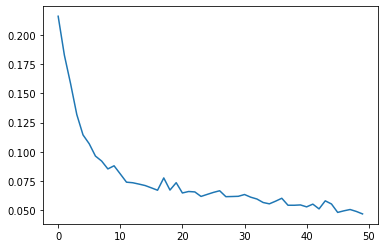

In [103]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

In [76]:
## 저장하기

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y_oh,test_size=0.2)
model = Sequential()
model.add(Dense(24, input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='relu'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics= ['accuracy'], optimizer ='adam')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 24)                312       
                                                                 
 dense_49 (Dense)            (None, 12)                300       
                                                                 
 dense_50 (Dense)            (None, 6)                 78        
                                                                 
 dense_51 (Dense)            (None, 1)                 7         
                                                                 
Total params: 697
Trainable params: 697
Non-trainable params: 0
_________________________________________________________________


In [79]:
import os

In [81]:
model_dir = './data/model_check'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [84]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
modelpath = './data/model_check/'